In [1]:
%pip install opencv-python ultralytics matplotlib pandas --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.1 MB/s eta 0:00:00


In [2]:
import cv2
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 16.4MB/s]


In [4]:
%pip install opencv-python pandas geopandas matplotlib contextily shapely


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 85.9 MB/s eta 0:00:00


🚗 Simulated Vehicle Count: 41


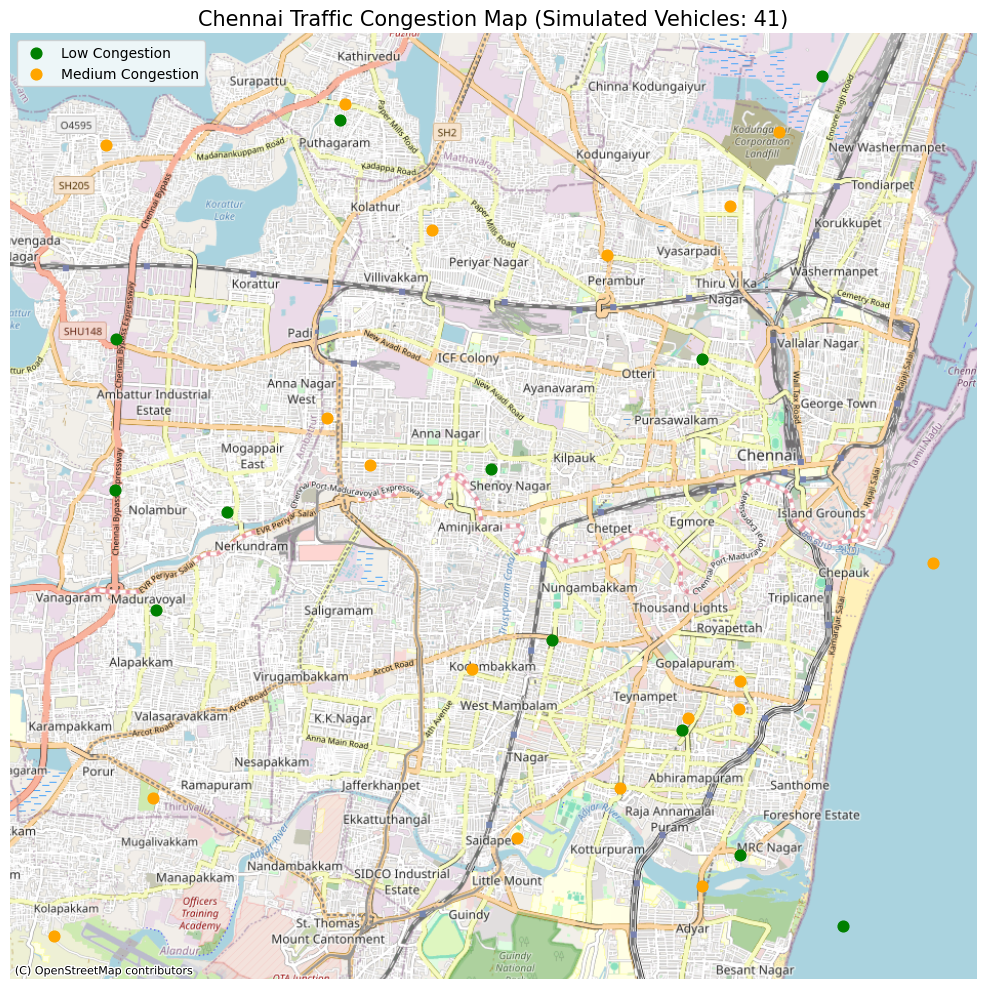

🗺️ Map saved as 'simulated_chennai_congestion_map.png'


In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# -------------------------------------
# Step 1: Simulate Random Vehicle Count
# -------------------------------------
# Let's assume random vehicle counts between 30 and 100
vehicle_counts = np.random.randint(30, 101)
print(f"🚗 Simulated Vehicle Count: {vehicle_counts}")

# -------------------------------------
# Step 2: Generate Synthetic Geo-Data for Chennai
# -------------------------------------
np.random.seed(42)
num_points = 30

# Simulate speeds: higher vehicle count = more congestion = lower average speed
avg_speed = max(10, 60 - vehicle_counts // 2)  # Ensure speed doesn’t go below 10
speeds = np.clip(np.random.normal(avg_speed, 10, num_points), 10, 60)

data = {
    'latitude': np.random.uniform(13.00, 13.15, num_points),
    'longitude': np.random.uniform(80.15, 80.30, num_points),
    'speed_kmph': speeds
}
df = pd.DataFrame(data)

def congestion_level(speed):
    if speed > 40:
        return 'Low'
    elif speed > 20:
        return 'Medium'
    else:
        return 'High'

df['congestion'] = df['speed_kmph'].apply(congestion_level)

# -------------------------------------
# Step 3: Create GeoDataFrame and Plot Map
# -------------------------------------
gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df.longitude, df.latitude)],
    crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

color_map = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
gdf['color'] = gdf['congestion'].map(color_map)

fig, ax = plt.subplots(figsize=(12, 10))
for level, group in gdf.groupby('congestion'):
    group.plot(ax=ax, markersize=60, color=color_map[level], label=f"{level} Congestion")

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.title(f"Chennai Traffic Congestion Map (Simulated Vehicles: {vehicle_counts})", fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("simulated_chennai_congestion_map.png", dpi=300, bbox_inches='tight')
plt.show()

print("🗺️ Map saved as 'simulated_chennai_congestion_map.png'")
